In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

### Initial Data Exploration

In [8]:
df = pd.read_csv("data-ori.csv")
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [9]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


In [10]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

No missing values

In [11]:
df["SOURCE"].value_counts()

out    2628
in     1784
Name: SOURCE, dtype: int64

The data set is unbalanced which has to be taken into account when defining models

In [12]:
df.corr()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.973267,0.864989,-0.217218,-0.003562,0.083714,0.108098,0.054948,-0.254799
HAEMOGLOBINS,0.973267,1.000000,0.818013,-0.208583,-0.045441,0.203248,0.314159,0.105379,-0.239480
ERYTHROCYTE,0.864989,0.818013,1.000000,-0.186711,0.025879,-0.383666,-0.048313,-0.436041,-0.412858
LEUCOCYTE,-0.217218,-0.208583,-0.186711,1.000000,0.283262,-0.014840,0.003194,-0.015885,0.191987
THROMBOCYTE,-0.003562,-0.045441,0.025879,0.283262,1.000000,-0.138058,-0.198921,-0.075961,0.031064
MCH,0.083714,0.203248,-0.383666,-0.014840,-0.138058,1.000000,0.589830,0.931804,0.350166
MCHC,0.108098,0.314159,-0.048313,0.003194,-0.198921,0.589830,1.000000,0.259672,0.041741
MCV,0.054948,0.105379,-0.436041,-0.015885,-0.075961,0.931804,0.259672,1.000000,0.395380
AGE,-0.254799,-0.239480,-0.412858,0.191987,0.031064,0.350166,0.041741,0.395380,1.000000


### Data visualization

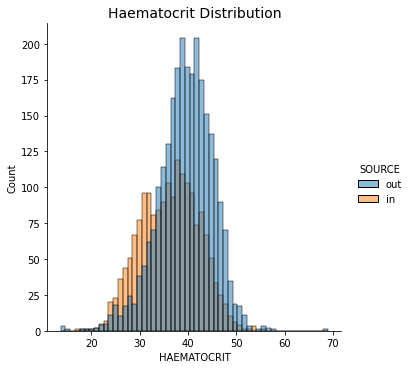

In [17]:
sns.displot(data=df, x="HAEMATOCRIT", hue="SOURCE")
plt.title("Haematocrit Distribution", fontsize = 14)
plt.show()

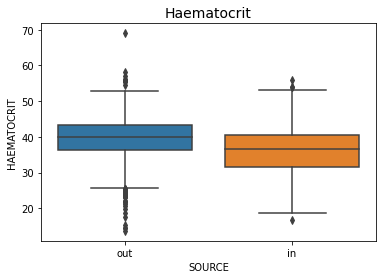

In [20]:
sns.boxplot(x="SOURCE", y="HAEMATOCRIT", data=df)
plt.title("Haematocrit", fontsize = 14)
plt.show()

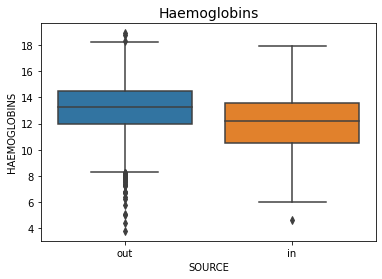

In [21]:
sns.boxplot(x="SOURCE", y="HAEMOGLOBINS", data=df)
plt.title("Haemoglobins", fontsize = 14)
plt.show()

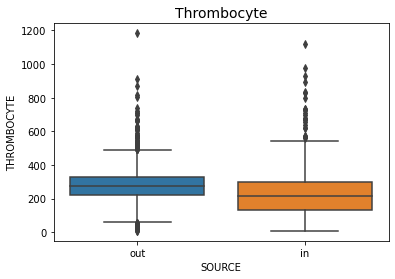

In [22]:
sns.boxplot(x="SOURCE", y="THROMBOCYTE", data=df)
plt.title("Thrombocyte", fontsize = 14)
plt.show()

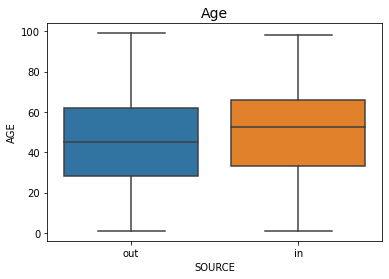

In [23]:
sns.boxplot(x="SOURCE", y="AGE", data=df)
plt.title("Age", fontsize = 14)
plt.show()

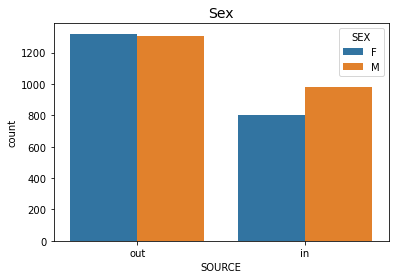

In [33]:
sns.countplot(data=df, x="SOURCE", hue="SEX")
plt.title("Sex", fontsize = 14)
plt.show()

### Features and labels creation

In [4]:
scaler = StandardScaler()

df["SEX"].replace(to_replace="M", value=1, inplace=True)
df["SEX"].replace(to_replace="F", value=0, inplace=True)

features = df.drop("SOURCE",axis=1)
features_scaled = scaler.fit_transform(features)
features_scaled

df["SOURCE"].replace(to_replace="in", value=1, inplace=True)
df["SOURCE"].replace(to_replace="out", value=0, inplace=True)
Y = df["SOURCE"].to_numpy()
Y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
features_scaled.shape

(4412, 10)

### Splitting data to training and test sets

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(features_scaled, Y, test_size=0.2, random_state=2)
Y_test.shape

(883,)

### Create a linear logistic regression classifier by sklearn library

In [79]:
lr_linear=LogisticRegression(class_weight={1: 1.5})
lr_linear.fit(X_train, Y_train)

LogisticRegression(class_weight={1: 1.5})

### Evaluate the lr model by accuracy and confusion matrix

In [80]:
lr_linear_acc = lr_linear.score(X_test, Y_test)
lr_linear_acc

0.7066817667044167

In [81]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(10, 8))
    ax= plt.subplot()
    
    sns.heatmap(cm, annot=True, annot_kws={"size": 20}, ax = ax, fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels', fontsize = 15)
    ax.set_ylabel('True labels', fontsize = 15)
    ax.set_title('Confusion Matrix', fontsize = 15); 
    ax.xaxis.set_ticklabels(['out care', 'in care'], fontsize = 13); ax.yaxis.set_ticklabels(['out care', 'in care'], fontsize = 13) 
    
    plt.show() 

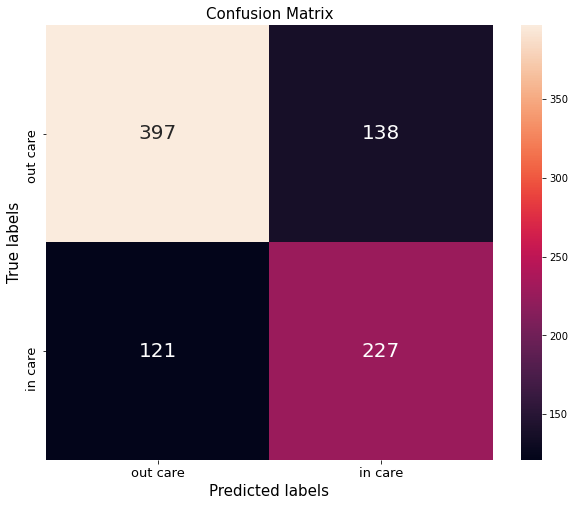

In [82]:
lr_linear_pred = lr_linear.predict(X_test)
plot_confusion_matrix(Y_test,lr_linear_pred)

### Create a support vector machine classifier by sklearn library

In [112]:
svm = SVC(class_weight={1: 1.5})
svm.fit(X_train, Y_train)

SVC(class_weight={1: 1.5})

### Evaluate the svm model by accuracy and confusion matrix

In [113]:
svm_acc = svm.score(X_test, Y_test)
svm_acc

0.7576443941109853

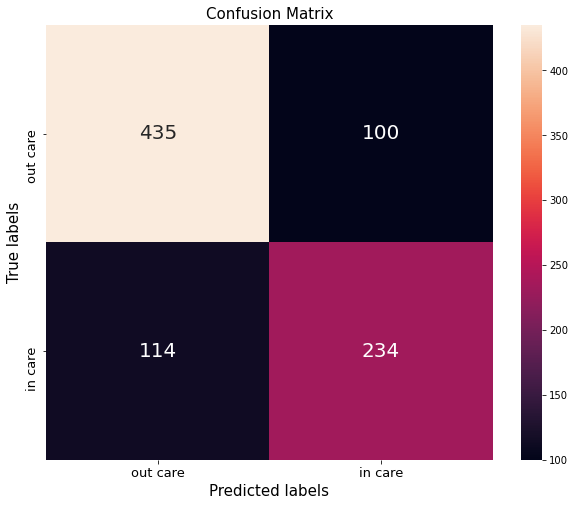

In [114]:
svm_pred = svm.predict(X_test)
plot_confusion_matrix(Y_test,svm_pred)

### Create non-linear deep learning model with Keras

In [127]:
model = Sequential()                                                  
model.add(Dense(20, activation="leaky_relu", input_shape=(10,)))           
model.add(Dense(20, activation="leaky_relu"))       
model.add(Dense(1, activation="sigmoid"))    

In [128]:
model.compile(optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"])

In [130]:
batch_size = 32
model.fit(X_train,Y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, Y_test), class_weight={0:1, 1:1.5})

Epoch 1/10
111/111 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.7319 - val_loss: 0.5462 - val_accuracy: 0.7361
Epoch 2/10
111/111 [==============================] - 0s 4ms/step - loss: 0.6497 - accuracy: 0.7407 - val_loss: 0.5503 - val_accuracy: 0.7373
Epoch 3/10
111/111 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.7317 - val_loss: 0.5408 - val_accuracy: 0.7350
Epoch 4/10
111/111 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.7387 - val_loss: 0.5419 - val_accuracy: 0.7407
Epoch 5/10
111/111 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.7387 - val_loss: 0.5388 - val_accuracy: 0.7350
Epoch 6/10
111/111 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.7413 - val_loss: 0.5424 - val_accuracy: 0.7327
Epoch 7/10
111/111 [==============================] - 0s 4ms/step - loss: 0.6398 - accuracy: 0.7464 - val_loss: 0.5421 - val_accuracy: 0.7350
Epoch 

In [131]:
model_acc = model.evaluate(X_test, Y_test)
model_acc[1]

28/28 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7384


0.7383918166160583

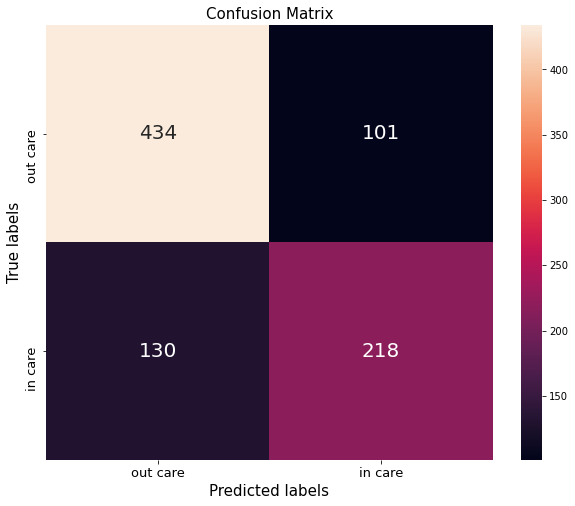

In [132]:
model_pred = (model.predict(X_test) > 0.5).astype("int32")
#model_pred
plot_confusion_matrix(Y_test,model_pred)